
focus on fed data and general economy vs individual companies? kinda changing project, but it was mentioned in porposal. Not like the professor will care. Neither professor or TA looks at anything before report. just need to bluff for other students. 

fed balance sheet is only by quarter. can i extent it for a date range??

snp from fed too.

could also get monthy cpi??

some data not in good format. this was not realize at begining of project. too late to change it. 
data might actually be good???



In [ ]:
import requests
import json
import pandas as pd
import numpy as np
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
np.random.seed(0)
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
g = pd.read_csv('GOOG.csv')  
google = pd.DataFrame()
google[["date"]] = g[["Date"]]
google[["adjClose"]] = g[["Adj Close"]]

#google = google.set_index("date")

google.loc[:,'yesterday'] = google.loc[:,'adjClose'].shift()
google = google.dropna()
#google["google"] = google["adjClose"]- google["yesterday"]

google["google"] = ((google["adjClose"]- google["yesterday"]) / ((google["adjClose"]+ google["yesterday"])/2)  ) *100


google = google.drop(columns=['adjClose', 'yesterday'])

In [ ]:
t = pd.read_csv('TSLA.csv')  
tesla = pd.DataFrame()
tesla[["date"]] = t[["Date"]]
tesla[["adjClose"]] = t[["Adj Close"]]

#tesla = tesla.set_index("date")

tesla.loc[:,'yesterday'] = tesla.loc[:,'adjClose'].shift()
tesla = tesla.dropna()
#google["google"] = google["adjClose"]- google["yesterday"]

#percentage change from day to day 
tesla["stockPrice"] = ((tesla["adjClose"]- tesla["yesterday"]) / ((tesla["adjClose"]+ tesla["yesterday"])/2)  ) *100


tesla = tesla.drop(columns=['adjClose', 'yesterday'])

In [563]:
sp = pd.read_csv('SP500.csv')  
sp.head(20)

,DATE,SP500
0,2017-04-07,2355.54
1,2017-04-10,2357.16
2,2017-04-11,2353.78
3,2017-04-12,2344.93
4,2017-04-13,2328.95
5,2017-04-14,.
6,2017-04-17,2349.01
7,2017-04-18,2342.19
8,2017-04-19,2338.17
9,2017-04-20,2355.84


In [568]:
sp = pd.read_csv('SP500.csv')  
sp500 = pd.DataFrame()
sp500[["date"]] = sp[["DATE"]]
sp500[["adjClose"]] = sp[["SP500"]]

#sp500[["adjClose"]] = sp500[["adjClose"]].replace('.', '0')
sp500 = sp500[sp500.adjClose != '.']


sp500 = sp500.astype({"adjClose": 'float'})
#google = google.set_index("date")

In [569]:


sp500.loc[:,'yesterday'] = sp500.loc[:,'adjClose'].shift()
sp500 = sp500.dropna()
#google["google"] = google["adjClose"]- google["yesterday"]

sp500["sp500"] = ((sp500["adjClose"]- sp500["yesterday"]) / ((sp500["adjClose"]+ sp500["yesterday"])/2)  ) *100


sp500 = sp500.drop(columns=['adjClose', 'yesterday'])

In [570]:
sp500

,date,sp500
1,2017-04-10,0.068750
2,2017-04-11,-0.143496
3,2017-04-12,-0.376699
4,2017-04-13,-0.683800
6,2017-04-17,0.857639
...,...,...
1300,2022-04-01,0.340448
1301,2022-04-04,0.805828
1302,2022-04-05,-1.263099
1303,2022-04-06,-0.976431


In [571]:
#tesla

In [572]:
tesla_insider = pd.read_csv('tesla_insider.csv') #, parse_dates=['transactionDate']

In [573]:
tesla_insider.dtypes
#tesla_insider = tesla_insider.set_index("transactionDate")#maybe not this???

symbol                     object
name                       object
share                       int64
change                      int64
filingDate                 object
transactionDate            object
transactionCode            object
transactionPrice          float64
dollarAmount              float64
insiderPortfolioChange    float64
buyOrSale                  object
dtype: object

In [574]:
#tesla_insider['transactionDate'] = pd.to_datetime(tesla_insider['transactionDate'], format='%Y-%m-%d')


In [575]:
tesla_insider

,symbol,name,share,change,filingDate,transactionDate,transactionCode,transactionPrice,dollarAmount,insiderPortfolioChange,buyOrSale
0,TSLA,Baglino Andrew D,20138,-897,2022-03-08,2022-03-07,S,845.391,-758315.727,-0.042643,Sale
1,TSLA,Kirkhorn Zachary,59318,-2389,2022-03-08,2022-03-07,S,845.391,-2019639.099,-0.038715,Sale
2,TSLA,Taneja Vaibhav,24684,-1535,2022-03-08,2022-03-07,S,845.391,-1297675.185,-0.058545,Sale
3,TSLA,Baglino Andrew D,21035,862,2022-03-08,2022-03-05,M,0.000,0.000,0.042730,Gift
4,TSLA,Baglino Andrew D,20173,924,2022-03-08,2022-03-05,M,0.000,0.000,0.048002,Gift
...,...,...,...,...,...,...,...,...,...,...,...
1260,TSLA,Musk Kimbal,610247,-300,2021-04-05,2021-04-01,S,663.967,-199190.100,-0.000491,Sale
1261,TSLA,Musk Kimbal,610547,-693,2021-04-05,2021-04-01,S,662.431,-459064.683,-0.001134,Sale
1262,TSLA,Musk Kimbal,611240,-200,2021-04-05,2021-04-01,S,660.940,-132188.000,-0.000327,Sale
1263,TSLA,Musk Kimbal,611440,-300,2021-04-05,2021-04-01,S,660.113,-198033.900,-0.000490,Sale


In [576]:

allVals = pysqldf("SELECT symbol, sum(change), transactionDate, sum(transactionPrice), sum(dollarAmount), insiderPortfolioChange, buyOrSale,count(buyOrSale) FROM tesla_insider  group by buyOrSale,transactionDate;")

In [577]:
allVals

,symbol,sum(change),transactionDate,sum(transactionPrice),sum(dollarAmount),insiderPortfolioChange,buyOrSale,count(buyOrSale)
0,TSLA,12000,2021-04-01,74.170,8.900400e+05,0.020009,Buy,1
1,TSLA,4090,2021-04-05,109.980,2.235858e+05,0.222173,Buy,2
2,TSLA,10000,2021-04-12,55.320,5.532000e+05,0.197636,Buy,1
3,TSLA,62500,2021-04-26,52.380,3.273750e+06,12.500000,Buy,1
4,TSLA,1000,2021-04-27,41.570,4.157000e+04,0.052318,Buy,1
...,...,...,...,...,...,...,...,...
84,TSLA,-25000,2022-02-01,19309.190,-2.308913e+07,-0.668874,Sale,21
85,TSLA,-1250,2022-02-17,913.260,-1.141575e+06,-0.021802,Sale,1
86,TSLA,-3500,2022-02-28,815.720,-2.855020e+06,-0.153853,Sale,1
87,TSLA,-25000,2022-03-01,19160.306,-2.169496e+07,-0.056604,Sale,22


In [578]:

buys = pysqldf("SELECT symbol, sum(change), transactionDate, sum(transactionPrice), sum(dollarAmount), insiderPortfolioChange, count(buyOrSale) FROM tesla_insider where buyOrSale == 'Buy' group by transactionDate;")

In [579]:

sales = pysqldf("SELECT symbol, sum(change), transactionDate, sum(transactionPrice), sum(dollarAmount), insiderPortfolioChange, count(buyOrSale) FROM tesla_insider where buyOrSale == 'Sale' group by transactionDate;")

In [580]:
#buys

In [581]:
#sales

In [582]:
salesData = pd.DataFrame()


salesData[['date']] = sales[['transactionDate']]
salesData[['change_sale']] = sales[['sum(change)']]


salesData[['price_sale']] = sales[['sum(transactionPrice)']]
salesData[['count_sale']] = sales[['count(buyOrSale)']]

#salesData = salesData.set_index("date")



In [583]:
buysData = pd.DataFrame()


buysData[['date']] = buys[['transactionDate']]
buysData[['change_buy']] = buys[['sum(change)']]


buysData[['price_buy']] = buys[['sum(transactionPrice)']]
buysData[['count_buy']] = buys[['count(buyOrSale)']]

#buysData = buysData.set_index("date")


In [584]:
#salesData
#buysData

In [585]:

#buys.dtypes

insiderData = buysData.merge(salesData,how='outer')

In [630]:
len(insiderData)

35

In [587]:
#left_df.merge(right_df, on='user_id', how='left')

#insiderData.fillna(0)


In [588]:
teslaDataset = tesla.merge(insiderData,how='outer')

In [589]:

teslaDataset = teslaDataset.fillna(0)

In [590]:
#teslaDataset = teslaDataset.set_index("date")

In [591]:
teslaDataset 

,date,stockPrice,change_buy,price_buy,count_buy,change_sale,price_sale,count_sale
0,2021-04-06,0.082450,0.0,0.00,0.0,0.0,0.000,0.0
1,2021-04-07,-3.030996,0.0,0.00,0.0,0.0,0.000,0.0
2,2021-04-08,1.894051,0.0,0.00,0.0,0.0,0.000,0.0
3,2021-04-09,-0.996453,0.0,0.00,0.0,0.0,0.000,0.0
4,2021-04-12,3.620009,10000.0,55.32,1.0,-10000.0,10425.646,15.0
...,...,...,...,...,...,...,...,...
249,2022-03-30,-0.508758,0.0,0.00,0.0,0.0,0.000,0.0
250,2022-03-31,-1.509494,0.0,0.00,0.0,0.0,0.000,0.0
251,2022-04-01,0.646566,0.0,0.00,0.0,0.0,0.000,0.0
252,2021-04-01,0.000000,12000.0,74.17,1.0,-12000.0,16905.681,25.0


In [515]:
#sp500 = sp500.set_index("date")

In [592]:
teslaDataset_2 = teslaDataset.merge(sp500,how='left', on='date')
teslaDataset_2 = teslaDataset_2.set_index("date")

In [593]:
teslaDataset_2
#teslaDataset_2 = teslaDataset_2.set_index("date")

,stockPrice,change_buy,price_buy,count_buy,change_sale,price_sale,count_sale,sp500
date,,,,,,,,
2021-04-06,0.082450,0.0,0.00,0.0,0.0,0.000,0.0,-0.097401
2021-04-07,-3.030996,0.0,0.00,0.0,0.0,0.000,0.0,0.147414
2021-04-08,1.894051,0.0,0.00,0.0,0.0,0.000,0.0,0.421175
2021-04-09,-0.996453,0.0,0.00,0.0,0.0,0.000,0.0,0.769028
2021-04-12,3.620009,10000.0,55.32,1.0,-10000.0,10425.646,15.0,-0.019620
...,...,...,...,...,...,...,...,...
2022-03-30,-0.508758,0.0,0.00,0.0,0.0,0.000,0.0,-0.631359
2022-03-31,-1.509494,0.0,0.00,0.0,0.0,0.000,0.0,-1.577600
2022-04-01,0.646566,0.0,0.00,0.0,0.0,0.000,0.0,0.340448


In [594]:
#teslaDataset.to_csv('tesla_dataset.csv', index=False) 
#teslaDataset_2.to_csv('tesla_dataset_2.csv', index=False) 

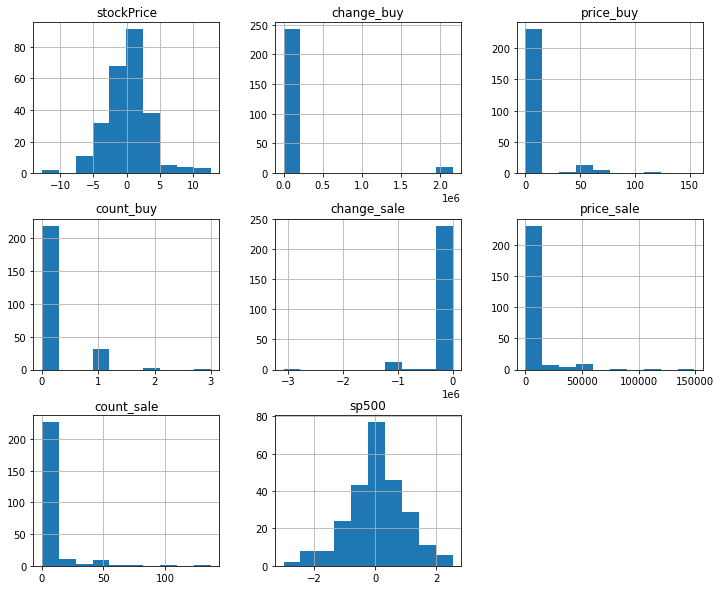

In [595]:
teslaDataset_2.hist(figsize = (12,10))
plt.show()

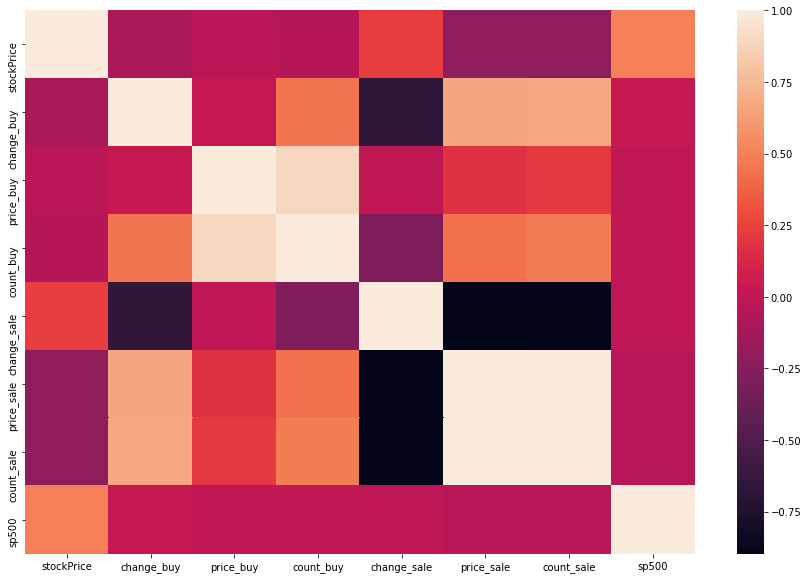

In [633]:
import seaborn as sns

C_mat = teslaDataset_2.corr()
fig = plt.figure(figsize = (15,10))

sns.heatmap(C_mat)
plt.show()

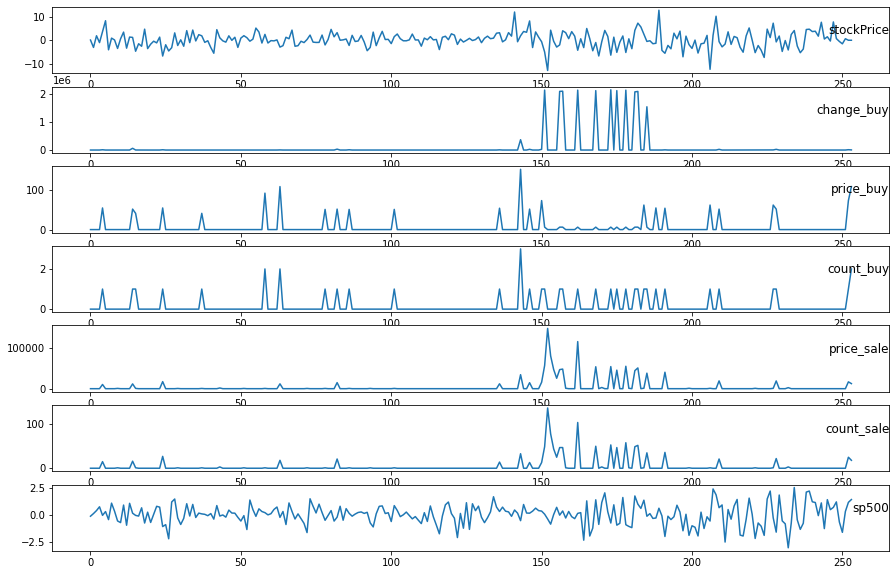

In [635]:
tesla_copy = teslaDataset_2.copy()
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = tesla_copy
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column

pyplot.figure(figsize = (15,10))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

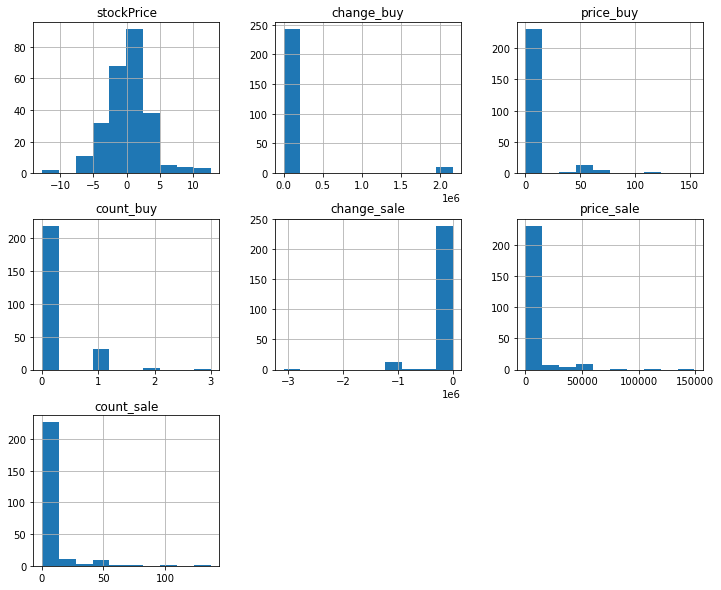

In [384]:
tesla_copy.hist(figsize = (12,10))
plt.show()

In [ ]:
google_insider = pd.read_csv('google_insider.csv') #, parse_dates=['transactionDate']

In [ ]:
google_insider.dtypes
#tesla_insider = tesla_insider.set_index("transactionDate")#maybe not this???

In [ ]:
google_insider

In [ ]:

allVals = pysqldf("SELECT symbol, sum(change), transactionDate, sum(transactionPrice), sum(dollarAmount), insiderPortfolioChange, buyOrSale,count(buyOrSale) FROM google_insider  group by buyOrSale,transactionDate;")

In [ ]:

buys = pysqldf("SELECT symbol, sum(change), transactionDate, sum(transactionPrice), sum(dollarAmount), insiderPortfolioChange, count(buyOrSale) FROM google_insider where buyOrSale == 'Buy' group by transactionDate;")

In [ ]:

sales = pysqldf("SELECT symbol, sum(change), transactionDate, sum(transactionPrice), sum(dollarAmount), insiderPortfolioChange, count(buyOrSale) FROM google_insider where buyOrSale == 'Sale' group by transactionDate;")

In [ ]:
salesData = pd.DataFrame()


salesData[['date']] = sales[['transactionDate']]
salesData[['change_sale']] = sales[['sum(change)']]


salesData[['price_sale']] = sales[['sum(transactionPrice)']]
salesData[['count_sale']] = sales[['count(buyOrSale)']]

#salesData = salesData.set_index("date")

In [ ]:
buysData = pd.DataFrame()


buysData[['date']] = buys[['transactionDate']]
buysData[['change_buy']] = buys[['sum(change)']]


buysData[['price_buy']] = buys[['sum(transactionPrice)']]
buysData[['count_buy']] = buys[['count(buyOrSale)']]

#buysData = buysData.set_index("date")

In [621]:
#buys.dtypes

insiderData = buysData.merge(salesData,how='outer')

In [ ]:
googleDataset = google.merge(insiderData,how='outer')

In [ ]:
googleDataset = googleDataset.fillna(0)

In [ ]:
googleDataset = googleDataset.set_index("date")

In [ ]:
googleDataset_2 = googleDataset.merge(sp500,how='left', on='date')
googleDataset_2 = googleDataset_2.set_index("date")

In [ ]:
#googleDataset.to_csv('google_dataset.csv', index=False) 
#googleDataset_2.to_csv('google_dataset_2.csv', index=False) 

In [ ]:
googleDataset_2

In [ ]:
googleDataset_2.hist(figsize = (12,10))
plt.show()

In [ ]:
import seaborn as sns

C_mat = googleDataset_2.corr()
fig = plt.figure(figsize = (15,10))

sns.heatmap(C_mat)
plt.show()

In [ ]:
google_copy = googleDataset_2.copy()
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = google_copy
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6,7]
i = 1
# plot each column
pyplot.figure(figsize = (15,10))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [ ]:
google_copy.hist(figsize = (12,10))
plt.show()